In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

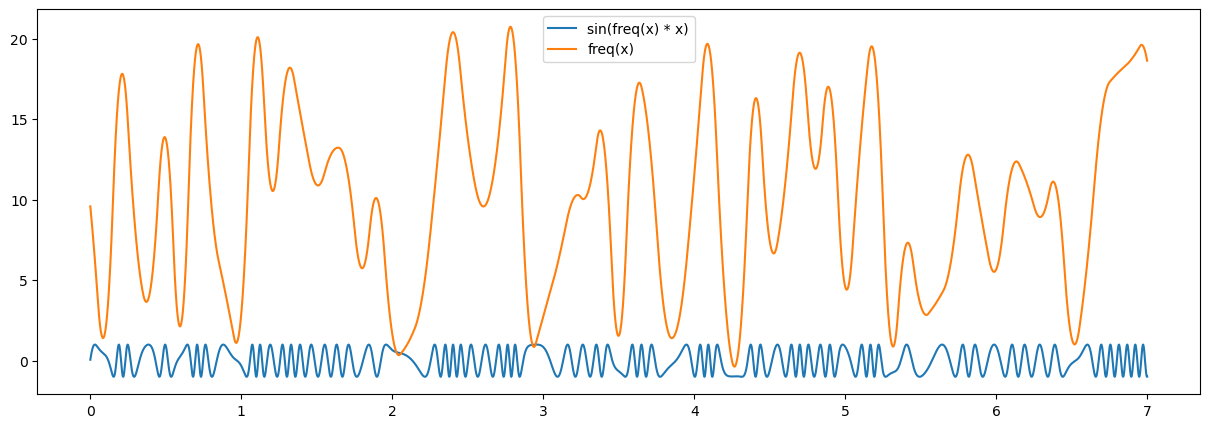

In [128]:
x_samples = np.arange(-1, 10, 0.1)
freq_samples = np.random.random(x_samples.shape) * 20 + 0.5

dt = 0.001
x = np.arange(0, 7, dt)

dx = np.full_like(x, dt)       # Change in x

interpolation = interp1d(x_samples, freq_samples, kind='quadratic')
freq = interpolation(x)

x_plot = (freq * dx).cumsum()    # Cumsum freq * change in x
y = np.sin(2*np.pi*x_plot)

# y = np.sin(2*np.pi*freq*x)

fig,ax = plt.subplots(figsize = (15,5))
ax.plot(x, y, label="sin(freq(x) * x)")
ax.plot(x, freq, label="freq(x)")
plt.legend()
plt.show()

In [135]:
with pm.Model() as model:
    l_freq = pm.GaussianRandomWalk('l_freq', mu = 0, sigma = 1, shape=len(y), initval = freq)
    exp_l_freq = pm.Deterministic('exp_l_freq', pm.math.exp(l_freq))
    # amp = pm.GaussianRandomWalk('amp', shape=len(y))
    ll = pm.Normal('obs', 
                   2*np.pi*pm.math.sin((exp_l_freq * dx).cumsum()),# * pm.math.exp(amp),
                   observed = y)

/home/abuzarmahmood/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/distributions/timeseries.py:293: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(


In [ ]:
with model:
    map_estimate = pm.find_MAP()

In [ ]:
#plt.plot(x,freq)
fig, ax = plt.subplots(2,1,figsize = (15,5))
ax[0].plot(x,freq)
ax[0].plot(x, map_estimate['l_freq'], alpha = 0.5)
ax[1].plot(x,np.sin(2*np.pi*np.cumsum(freq*dx)))
ax[1].plot(x, np.sin(2*np.pi*np.cumsum(map_estimate['l_freq']*dx)))